# 2 Numerical computation
* [**2.0 Preamble**](#preamble)
* [**2.1 Vector calculations**](#vectors)
* [**2.2 Vectorized thinking**](#vectorized): `for` considered harmful
* [**2.3 Arrays**](#arrays)
* [**2.4 Numerical optimization and fitting**](#opt)
* [**2.5 Simulation**](#sim)
* [**More exercises**](#exercises)

Working with numbers is central to almost all scientific and engineering computing, from deep learning to image processing to climate simulation. We could use Python directly for numerical
computation&mdash;but it's much faster to use Python just as 'glue', using it to write concise code and to quickly develop our thinking, and to rely on 
carefully optimized low-level libraries for the heavy lifting.

<div class="alert alert-warning">
**Goal of this notebook:**
Learn your way around the two main Python libraries for numerical work, 
<a href="http://www.numpy.org/">NumPy</a> 
and 
<a href="https://www.scipy.org/">SciPy</a>,
and learn how to produce basic plots with [matplotlib](https://matplotlib.org/).
</div>

There are some exercises in this section of notes. They are for you to get practice on: they are optional, and do not contribute to your final grade. You can check your answers to labelled exercises as described in [&sect;0.3](0.%20About%20this%20course.ipynb#grader) using `section='notes2'`.

## 2.0 Preamble<span id="preamble"></span>

At the top of almost every piece of scientific computing work, we'll import these standard modules. 

In [3]:
# Import modules, and give them short aliases so we can write e.g. np.foo rather than numpy.foo
import math, random
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.optimize
# The next line is a piece of magic, to let plots appear in our Jupyter notebooks
%matplotlib inline    

ModuleNotFoundError: No module named 'scipy'

## 2.1 Vector calculations<span id="vectors"></span>

In [&sect;1](1.%20Programming%20in%20Python.ipynb) we learnt about Python lists, which can store mixed data types e.g. integers mixed with strings and sublists and even functions. The flexibility comes at the price of performance. In scientific computing, it's better to use specialised classes for vectors, and to use functions that operate on entire vectors at once. This is called _vectorized thinking_, and it's a core skill for scientific computing. Once you get the hang of it, you will write code that is more concise and faster. Here are some simple examples.

In [5]:
x = np.array([1,2,5,3,2])  # create a numpy vector out of a Python list
y = np.ones(5)             # create a numpy vector [1,1,1,1,1]
x + y                      # iterates over all elements of x and y for you

array([ 2.,  3.,  6.,  4.,  3.])

All the elements of a vector have to be the same [type](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html). Use `x.dtype` to find this type,
and [`x.astype`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.astype.html#numpy-ndarray-astype) to convert a vector from one type to another.

In [6]:
x = np.arange(10)
y = (x > 5)
z = np.ones_like(x)
(x.dtype, y.dtype, z.dtype)

(dtype('int64'), dtype('bool'), dtype('int64'))

To be good at writing vectorized code, we need to know what sort of calculations we can do on vectors.
Here are some [useful routines](https://docs.scipy.org/doc/numpy/reference/routines.html#routines):

**Maths:**

* Normal mathematical expressions work on vectors, and you can mix vectors and scalars, e.g. `x + y ** 2 + 5 >= z`
* `np.sin`, `np.exp`, `np.floor`, ...
* `x @ y` gives the dot product, `np.linalg.norm(x)` is the norm
* `np.sum` and `np.prod`; `np.cumsum(x)` gives $[x_0, x_0+x_1, x_0+x_1+x_2, \dots]$
* `np.min` and `np.max` for the overall min and max; `np.minimum(x,y)` for $[\min(x_0,y_0), \min(x_1,y_1), \dots]$
* and other [maths](https://docs.scipy.org/doc/numpy/reference/routines.math.html#mathematical-functions) and [statistics](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html) functions

**Create vectors:**

* `np.array([1,2,3])` creates a numpy vector from a Python list
* `np.zeros(n)`, `np.ones(n)`, `numpy.full(n,fill_value)`
* `numpy.ones_like(a)` creates a vector of the same shape as `a`
* `np.arange` is like Python's `range`
* `np.linspace(start,stop,n)` creates $n$ evenly-spaced points between `start` and `stop` inclusive, very useful for plotting
* `np.random.random(n)`, `np.random.choice(a,n)`, and other [random number generators](https://docs.scipy.org/doc/numpy/reference/routines.random.html)
* and other [array creation](https://docs.scipy.org/doc/numpy/reference/routines.array-creation.html#array-creation-routines) routines

### More elaborate example
Here's a more elaborate example: computing the [correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) between two vectors $x$ and $y$,

$$
\rho
= 
\frac{\sum_i(x_i - \bar{x})(y_i-\bar{y})}
{\sqrt{\sum_i(x_i-\bar{x})^2)} \sqrt{\sum_i(y_i-\bar{y})^2}}
$$

where $x$ and $y$ have the same length $N$, and 

$$
\bar{x}=\frac{1}{N}\sum_i x_i,
\quad
\bar{y}=\frac{1}{N}\sum_i y_i.
$$

Here are two pieces of code, one written in Python-style, one written in scientific computing style, to compute $\rho$. The latter is roughly 15 times faster. (The [magic command](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-time) `%%time` at the top of a cell makes the notebook print out the execution time.)

In [19]:
# Set up some parameters.
# We'll use a random number seed so our code is reproducible. Python's hash function gives an integer,
# suitable for use as a seed.
N = 10000000
rand_seed = 1618033988

In [17]:
%%time
# Python-style code

random.seed(rand_seed)
# Create two lists of random numbers, xs and ys, where each y depends on the corresponding x
xs = [random.random() for i in range(N)]
ys = [xs[i] + random.random() for i in range(N)]
# Compute the various terms involved in the formula
xbar = sum(xs) / N  # sum(list) is built into Python
ybar = sum(ys) / N
sxy = sum([(x-xbar)*(y-ybar) for x,y in zip(xs,ys)])  # this is how to iterate over a pair of lists
sxx = sum([(x-xbar)**2 for x in xs])
syy = sum([(y-ybar)**2 for y in ys])
rho = sxy / math.sqrt(sxx) / math.sqrt(syy)
print(rho)

0.7070356005706819
CPU times: user 5.98 s, sys: 1.55 s, total: 7.53 s
Wall time: 7.53 s


In [20]:
%%time
# Vectorized code

np.random.seed(rand_seed)
# Create two random vectors x and y
x = np.random.random(N)
y = x + np.random.random(N)
# Compute the terms in the formula. Note: @ means "dot product"
xbar = np.sum(x) / N
ybar = np.sum(y) / N
rho = ((x-xbar) @ (y-ybar)) / math.sqrt(np.sum((x-xbar)**2)) / math.sqrt(np.sum((y-ybar)**2))
print(rho)

0.707201664199
CPU times: user 266 ms, sys: 219 ms, total: 484 ms
Wall time: 537 ms


(Though if we really did know our way round numpy, we'd have used [`np.corrcoef`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html#numpy.corrcoef) rather than write our own code for $\rho$!)

<div class="alert alert-warning">**Exercise (ex1).**
Using Python-style code: let $x$ and $y$ be random numbers in the range $[-1,1]$, and let $d=\sqrt{x^2+y^2}$. Repeat this a million times, and find the mean and standard deviation of your values for $d$.
</div>

<div class="alert alert-warning">**Exercise (ex2).**
Repeat Exercise ex1, but this time using vectorized code. Compare the speed of the two styles of code.
</div>

## 2.2 Vectorized thinking: `for` considered harmful<span id="vectorized"></span>

Vectorized thinking isn't just for mathematical calculations &mdash; there are all sorts of programming constructs that can be vectorized also. In general, whenever you find yourself writing a `for` loop or a Python [list comprehension](1.%20Programming%20in%20Python.ipynb#comprehension), stop and see if you can vectorize your code. You'll usually end up with something more flexible for scientific computing.

**Programming:**

* `len(x)` gives the length of a vector
* `np.any`, `np.all` and other [logic functions](https://docs.scipy.org/doc/numpy/reference/routines.logic.html#logic-functions)
* `~x` is logical negation, the equivalent of Python's `not x`; `x & y` and `x | y` both work
* `np.count_nonzero(x)` counts the number of entries where `x` is `True` or non-zero
* `np.sort` sorts a vector; `np.argsort(x)` gives the vector `i` such that `x[i]` is sorted; also see other [sort functions](https://docs.scipy.org/doc/numpy/reference/routines.sort.html#sorting)
* `np.argmax` and other [search functions](https://docs.scipy.org/doc/numpy/reference/routines.sort.html#searching)
* `np.where(cond,x,y)` is the vectorized version of `x if cond else y`
* `np.vectorize(f)` is a vectorized version of an arbitrary Python function f

**Indexing:**

* The usual [slice notation](1.%20Programming%20in%20Python.ipynb#collections) works, e.g. `x[:10]` or `x[10:]` or `x[:-3]`
* We can index by a vector of booleans, e.g. `x[y>5] = 3`
* We can index by a vector of integers, e.g. `i=np.where(y>5); x[i]=3`
* `np.where(b)` gives a vector of indexes at which the boolean vector `b` is `True`
* `np.concatenate([v1,v2])` concatenates two or more vectors

### More elaborate example
Here's an example, a vectorized version of Exercise ex4 from Section 1. Suppose we want to sort the following vector by length, breaking ties alphabetically.

In [28]:
names = np.array(['adrian', 'chloe', 'guarav', 'shay', 'alexis', 'rebecca', 'zubin'])

* First, get a vector with the length of each name. Numpy does have some routines for working with strings, but as the name suggests it is really oriented around numbers, and I prefer to use Python functions. I'll still wrap them up with `np.vectorize`, so that I can apply them to a whole vector without having to write a list comprehension.
* Second, work out how to put `lengths` in order, breaking ties alphabetically by `names`. This is called lexicographic sorting, and there is a function `np.lexsort` that like `np.argsort` returns a vector of integer indexes that will achieve this ordering.
* Last, pick out the `names` in the order specified by these indexes.

In [1]:
lengths = np.vectorize(len)(names)
indexes = np.lexsort([names, lengths])
names[indexes]

NameError: name 'np' is not defined

At the [end of this notebook](#exercises) you'll find some more challenging exercises in vectorized thinking.

## 2.3 Arrays<span id="arrays"></span>

NumPy supports matrices and higher-dimensional arrays. (In fact, when we look up the help for any of the vectorized routines, we see that vectors are nothing more than one-dimensional arrays.) To enter a 2d array like
$$
a = \left( \begin{matrix} 2.2 & 3.7 & 9.1\\-4 & 3.1 & 1.3\end{matrix}\right)
$$
we type in

In [30]:
a = np.array([[2.2, 3.7, 9.1], [-4, 3.1, 1.3]])

Use `a.shape` to find the dimensions of an array:

In [ ]:
a.shape

To refer to a subarray, we can use an extended version of Python's slice notation.

In [31]:
a[:, :2]                   # all rows, first two columns
a[1, :]                    # second row (indexes start at 0), all columns
a[1]                       # another way to fetch the second row
a[:2, :2] = [[1,2],[3,4]]  # assign to a submatrix
a

array([[ 1. ,  2. ,  9.1],
       [ 3. ,  4. ,  1.3]])

To refer to arbitrary sets of elements in the array, we can use boolean indexing e.g. `a[a>=2]`, or integer indexing as in the code snippet below. These are both called [advanced indexing](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#advanced-indexing).

In [ ]:
a = np.zeros((3,3), dtype=np.int)
a[[0,1,2], [1,0,2]] = [1,1,1]
a

For 1d vectors the only reshaping operations are slicing and concatenating, but for higher dimensional arrays there is a whole variety of [reshaping functions](https://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html#array-manipulation-routines) such as stacking, tiling, transposing, etc. The most useful operations is adding a new dimension, for example to turn a one-dimensional vector into a column vector. The second most useful is stacking vectors to form an array.

In [34]:
x = np.array([1,2,3])  # one-dimensional, shape=(3,)
x[:, np.newaxis]       # two-dimensional, shape=(3,1)

array([[1],
       [2],
       [3]])

In [52]:
np.column_stack([[1,2], [3,4], [5,6]])

array([[1, 3, 5],
       [2, 4, 6]])

<div class="alert alert-warning">**Exercise (ex2).** What is the relationship between <code style="background-color:inherit">a.shape</code> and <code style="background-color:inherit">len(a)</code>?</div>

<div class="alert alert-warning">**Exercise (ex3).** Look up the NumPy help for <code style="background-color:inherit">np.arange</code> and <code style="background-color:inherit">np.reshape</code>, and use these functions to produce the $3\times5$ matrix
$$
b = \left( \begin{matrix} 
1 & 2 & 3 & 4 & 5\\
6 & 7 & 8 & 9 & 10\\
11 & 12 & 13 & 14 & 15
\end{matrix} \right)
$$
Look up the help for <code style="background-color:inherit">np.sum</code>, and compute the length-5 vector of column sums and the length-3 vector of row sums.
</div>

<div class="alert alert-warning">**Exercise (ex4).**
Find two different ways to use NumPy to create the column vector <code style="background-color:inherit">array([[1],[2],...,[n]])</code>.
</div>

<div class="alert alert-warning">**Exercise (ex5).**
A <a href="https://en.wikipedia.org/wiki/Permutation_matrix">permutation matrix</a> is a square matrix of 0s and 1s,
where each row contains exactly one 1, and each column likewise. (The code snippet above for advanced indexing creates a $3\times3$ permutation matrix.) Write code to generate a random $n\times n$ permutation matrix.
</div>

NumPy also has a powerful tool called [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) which generalizes "add a scalar to a vector", and which is used a lot in more advanced array-manipulating code. It's more advanced than we need for this course, but it's used a lot in machine learning and it's worth reading about.

In Easter term, you will study linear algebra in the _Maths for Natural Sciences_ course. If you want to try out the maths, you'll find relevant functions in [`np.linalg`](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html)
and
[`np.dual`](https://docs.scipy.org/doc/numpy/reference/routines.dual.html).

## 2.4 Numerical optimization and fitting<span id="opt"></span>

A common task in science and in machine learning is to find the minimum value of a function, which may have one or more variables. For example, we might have a collection of points that more or less follow a straight line, and we might want to use the equation $y=mx+c$. In this case, we'd like to tune the values of $m$ and $c$ so that the equation lies close to the data. We can achieve this by defining a function $L(m,c)$ that measures how far the points are from the straight line, and then choosing $m$ and $c$ to minimize $L(m,c)$.

<span style="background-color:red; padding:1pt; color:white">WARNING!</span> The methods we discuss here sometimes work brilliantly, but sometimes are unstable. This is not the fault of Python or the libraries we are using. 
It's just the case that sometimes the equations in the algorithm and numerical issues in the data are not well balanced. This is something we need to bear in mind every time we use these methods, and we should check the output, for example by plotting graphs.

Let's start by minimizing a simple function of one variable. We could use calculus to find the minimum for a simple example like this, but let's do it with computer power instead.

In [39]:
def f(x, a, b, c):
    return a*x + b*(x**2) + c*(x**4)

We'll plot this function first, to get a rough idea of where the minimum should be.
Visualisation is a crucial part of scientific computing, and we'll cover it in much more detail in [&sect;3 Working with Data](3.%20Working%20with%20data.ipynb), but for present purposes we'll just use some very simple plotting commands. The [pyplot tutorial](https://matplotlib.org/users/pyplot_tutorial.html) explains more options.

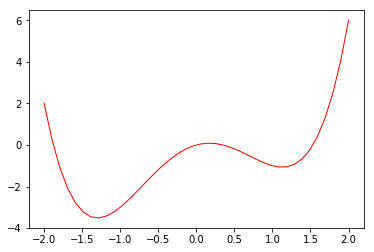

In [40]:
x = np.linspace(-2,2,40)          # 40 equally spaced points in the range [-2,2]
y = f(x, a=1, b=-3, c=1)          # f is already vectorized, because it only uses vectorized calculations
plt.plot(x, y, linestyle='-', linewidth=1, color='red')
plt.show()

The `scipy.optimize.fmin` function finds where the function achieves its minimum value, starting from an initial guess `x0`. The first argument is the function to optimize. In the snippet below we're giving it an anonymous function that is a version of `f` with the parameters `a`, `b` and `c` filled in.

In [41]:
scipy.optimize.fmin(lambda x: f(x,a=1,b=-3,c=1), x0=0.5)

Optimization terminated successfully.
         Current function value: -1.070230
         Iterations: 16
         Function evaluations: 32


array([ 1.13085938])

It found a local minimum, not the global minimum. This is often a problem with numerical optimization routines, and it's why it's helpful to look at the data first.

<div class="alert alert-warning">**Exercise (ex6).** 
What starting point do we need to give, so that it can find the global optimum?
Run <code style="background-color:inherit">scipy.optimize.fmin</code> for a range of values of 
<code style="background-color:inherit">x0</code> in the range $[-2,2]$. Tabulate 
<code style="background-color:inherit">x0</code> versus the minimizing $x$ it finds. You can turn off the diagnostic output with the option
<code style="background-color:inherit">disp=False</code>.</div>

Here is an example of a function of two variables. We'll try to fit the straight line $y=mx+c$ through a set of points. We'll define the _loss function_
$$
L(m,c) = \sum_i (m x_i + c - y_i)^2
$$
and look for $m$ and $c$ to minimize it.

In [42]:
x = np.linspace(-3,3,40)
y = np.sin(x) + 2 * np.random.random(x.shape)

def loss(m,c):
    return np.sum((m*x+c - y)**2)

Before we do any numerical work, we should visualize what we're doing. Here are a plot of the points $(x_i,y_i)$, and a surface plot of the loss function $L(m,c)$ as a function of $m$ and $c$. The 3d plotting functions are somewhat mysterious, and you should look at [relevant examples](https://matplotlib.org/examples/mplot3d/index.html) and copy them. 

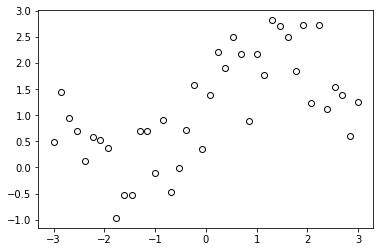

In [43]:
# Scatter plot of the data
plt.plot(x, y, marker='o', markerfacecolor='white', markeredgecolor='black', linestyle='None')
plt.show()

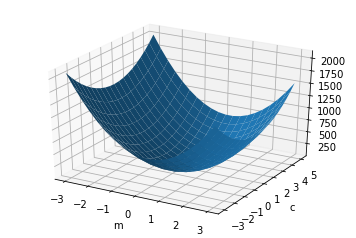

In [44]:
# Surface plot of loss(m,c)
# adapted from https://matplotlib.org/examples/mplot3d/surface3d_demo.html

# Create 2d arrays, one with each m value, one with each c value, one with loss
m,c = np.meshgrid(np.linspace(-3,3,20), np.linspace(-3,5,20))
l = np.zeros_like(m)
for i in range(l.shape[0]):
    for j in range(l.shape[1]):
        l[i,j] = loss(m[i,j], c[i,j])

from mpl_toolkits.mplot3d import axes3d   # import a library to allow 3d plots
axes = plt.figure().gca(projection='3d')  # say that we want axes for a 3d plot
axes.plot_surface(m, c, l)                # draw a surface plot
axes.set_xlabel('m')
axes.set_ylabel('c')
plt.show()

It doesn't look like $L(m,c)$ has any nasty surprises, so let's find the minimizing $m$ and $c$.

In [45]:
# To optimize a function of several several variables, provide them as an array
# of the appropriate length.
optpars = scipy.optimize.fmin(lambda params: loss(params[0], params[1]), x0=[0,0])
optpars

Optimization terminated successfully.
         Current function value: 25.961639
         Iterations: 58
         Function evaluations: 110


array([ 0.32481165,  1.12359353])

Now let's plot the data again, with the fitted straight line.

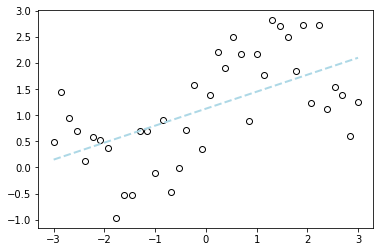

In [46]:
# Plot the points
plt.plot(x, y, marker='o', markerfacecolor='white', markeredgecolor='black', linestyle='None')
# Plot the fitted line
def fit(x):
    return optpars[0] * x + optpars[1]
plt.plot([-3,3], [fit(-3),fit(3)], linestyle='--', color='lightblue', linewidth=2)
# Show the graphic
plt.show()

## 2.5 Simulation<span id="sim"></span>

Simulation is a mainstay of scientific computing. A common style with numpy is to predefine an array to store the results, one row per timestep, and then iterate over timesteps gradually filling in the array. (This is the one case where `for` loops are appropriate.) Here's an example, a differential equation simulation. A model that has been proposed for [TCP](https://en.wikipedia.org/wiki/Transmission_Control_Protocol) is

$$
\frac{d x_t}{d t} = \frac{1}{\text{RTT}^2} - p_{t-\text{RTT}} x_{t-\text{RTT}} \frac{x_t}{2},
\quad\quad
p_t = \frac{\max(x_t-C,0)}{x_t}
$$

where $x_t$ is the transmission rate of a sender at time $t$ measured in packets per second, $\text{RTT}$ is the round trip time, $p_t$ is the packet drop probability, and $C$ is the link capacity. We might simulate this as follows.

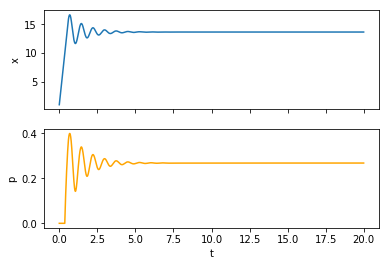

In [85]:
x0 = 1       # initial transmission rate, in pkt/sec
C = 10       # link capacity, in pkt/sec
T = 20       # simulated duration in seconds
RTT = 0.2    # round trip time in seconds
dt = 0.01    # timestep size
def P(x): return max(x-C,0) / x

# Initialization
num_iterations = np.ceil(T/dt).astype(int)
res = np.zeros((num_iterations, 3))  # a matrix to store t,x,p
res[0,1:] = [x0, P(x0)]
steps_back = int(RTT/dt)

# Loop
for i in range(1, num_iterations):
    (t,x,p),(xold,pold) = res[i-1], res[max(i-1-steps_back,0),1:]
    dx = 1/(RTT**2) - pold*xold*x / 2
    x = x + dx * dt
    p = P(x)
    res[i] = (t + dt, x, p)

# Plot the output (see Section 3 for more about plotting)
fig,(ax1,ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(res[:,0], res[:,1])
ax2.plot(res[:,0], res[:,2], color='orange')
ax1.set_ylabel('x')
ax2.set_ylabel('p')
ax2.set_xlabel('t')
plt.show()

* From a mathematical point of view this isn't ideal, because there are [much more sophisticated numerical methods for solving differential equations](https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.integrate.ode.html).
* From a computer science point of view this isn't ideal, because the code tangles together the iteration logic with the logging logic. You may like to rewrite it using [lazy lists](A1.%20Python%20language%20choices.ipynb#lazy).
* But from a scientific computing point of view, simulations like this are so easy to put together and learn from, that they are invaluable.

What we have written is called a discrete-time simulation, because time advances in fixed increments. 
In IA _Algorithms_ you will study the _heap_ data structure and event-driven simulation, in which time is pegged to changes in state.

# More exercises<span id="exercises"></span>

**Exercise (ex7).**
In [&sect;1](1.%20Programming%20in%20Python.ipynb#lindley) you wrote a Pythonic simulator for a queue, based on Lindley's recursion
$$
q_{t+1} = \max(q_t+a_t-C, 0).
$$
It can be proved that this yields the same answer as
$$
q_t = q_0 + x_t - \min(0, y_t),
$$
where
$$
x_t = \sum_{u=1}^t (a_u-C)
\quad\text{and}\quad
y_t = \min_{1 \leq u \leq t} (q_0 + x_u).
$$
Compute $x=[x_1,x_2,\dots]$ using [`np.cumsum`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html).
Compute $y=[y_1,y_2,\dots]$ using 
[`np.ufunc.accumulate`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ufunc.accumulate.html).
Hence compute $q=[q_1,q_2,\dots]$.
Check your answer against your Pythonic code.

**Exercise.** _Continuing from Assignment 2..._
In the kinetic exchange model, the poorest and the richest might swap places after just one transaction, which isn't very likely. Consider a different model for exchange. As before, suppose that two individuals with wealth $v$ and $w$ respectively are paired, but now let their wealth be updated by
$$
v_{\text{new}} = v + R \min(v,w),
\quad
w_{\text{new}} = w - R \min(v,w)
$$
where $R$ is now a random number in $[-1,1]$, chosen independently for every pair at every timestep. The idea is that each party to the exchange puts up a certain amount of money, but no more than they can afford. Call this the _value transfer_ model.

We can extend this model to include government intervention. Suppose the government charges a tax of say 20% on every exchange, collects all the tax revenue every timestep, and distributes it evenly to the entire population. This redistribution ought to have the effect of reducing inequality. Call this the _taxed value transfer_ model. Here is a concrete example, for a population of size 6.
> 1. Initial wealth values are $[0,2,5,3,1,2]$
> 1. We pair adjacent individuals: $[0,2; 5,3; 1,2]$
> 1. Random exchange amounts pre-tax are $[0,0; 2.6,-2.6; -0.4,0.4]$
> 1. Exchange amounts post-tax are $[0,0; 2.08,-2.6; -0.4,0.32]$
> 1. Government revenue is $(2.6-2.08) + (0.4-0.32) = 0.6$
> 1. Government redistributes $0.6/6=0.1$ to each person
> 1. Change in wealth is $[0.1,0.1, 2.18,-2.5, -0.3,0.42]$.<br>
> 1. New wealth vector is $[0.1, 2.1, 7.18, 0.5, 0.7, 2.42]$.

Also, let's introduce another way to measure inequality. The Gini coefficient is unfamiliar to many people, and it's easier to communicate "The richest 1% of the population own $x$% of the wealth."

Implement the taxed value transfer model. Implement the "top x%" measure. Simulate the taxed value transfer model, and measure the Gini coefficient and the "richest 1%" statistic at each timestep. Plot these two measures, as a function of time, for tax rates 0%, 20% and 40%. See [&sect;3](3.%20Working%20with%20data.ipynb) for tips on plotting.

**Exercise.** _Continuing from the assignment..._
Inflation means that wealth grows at an exponential rate, which is likely to exacerbate inequality. Compare a taxed value transfer model with tax rate 20% and no inflation, to a model with inflation of 3% per timestep. How much would tax have to increase, to compensate for this inflation?

**Exercise.** _Continuing from the assignment..._ The economist [Thomas Piketty argues](https://en.wikipedia.org/wiki/Capital_in_the_Twenty-First_Century) that we have entered an age where the return on capital is greater than the growth due to income, and that this leads to higher inequality. We could incorporate income into the model by assigning each individual $i$ a per-timestep income $g_i$, where the $g_i$ are randomly chosen _a priori_. If there were no exchange, then wealth would grow linearly, and so the Gini coefficient would remain equal to `gini(g)`. Investigate what happens when we combine income, inflation, and random exchange. How well correlated are income and wealth? Do you agree with Piketty?